In [ ]:
%cd ~/tesis/VoiceClonAR

In [138]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from voiceclonar.quality_assessment.evaluation import SyntheticSpeechQA

In [ ]:
tacotron2_path = Path("test/audios/tacotron2")
fastpitch_path = Path("test/audios/fastpitch")
fastpitch_rvc_path = Path("test/audios/fastpitch_rvc")

evaluator = SyntheticSpeechQA()
tacotron2_results = evaluator.evaluate_folder(tacotron2_path, reference_suffix="reference")
fastpitch_results = evaluator.evaluate_folder(fastpitch_path, reference_suffix="reference")
fastpitch_rvc_results = evaluator.evaluate_folder(fastpitch_rvc_path, reference_suffix="reference")

In [4]:
display(tacotron2_results)
display(fastpitch_results)
display(fastpitch_rvc_results)

,audio_name,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
0,F1_tacotron2,0.953476,2.244234,9.699905,2.760806,3.273947,0.638650,1.437817e-05
1,F2_tacotron2,0.935346,2.237152,9.551504,2.800036,2.949895,0.686361,9.639706e-07
2,F3_tacotron2,0.970172,2.365378,7.921284,3.148021,3.318037,0.716140,2.383652e-05
3,F4_tacotron2,0.972194,1.649062,9.156312,3.125634,3.605394,0.768033,8.823236e-07
4,F5_tacotron2,0.945467,1.948694,7.022989,3.007994,2.909522,0.729375,3.010370e-05
5,M1_tacotron2,0.959065,2.086048,10.459020,3.720948,3.205632,0.669439,6.171831e-04
6,M2_tacotron2,0.954004,2.064660,9.251705,3.161525,2.063439,0.642098,7.881150e-05
7,M3_tacotron2,0.963709,2.126922,4.139872,2.545603,2.904540,0.628501,4.176544e-04
8,M4_tacotron2,0.972457,2.091727,12.277911,4.530068,3.507826,0.704256,9.717915e-04
9,M5_tacotron2,0.950452,1.997205,6.171595,3.165935,3.061655,0.747312,8.295861e-04


,audio_name,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
0,arf_00295_fastpitch,0.998536,4.063192,21.690668,3.461505,3.007645,0.871126,0.000037
1,arf_02121_fastpitch,0.998961,4.163562,25.767517,4.171466,4.114840,0.847281,0.000044
2,arf_02484_fastpitch,0.997292,3.922206,27.787834,2.796024,4.444834,0.765453,0.000464
3,arf_03397_fastpitch,0.998078,3.706927,20.592876,4.319911,3.132532,0.780710,0.000161
4,arf_07060_fastpitch,0.996762,3.783851,23.957996,4.130047,3.560156,0.851405,0.002305
5,arm_00610_fastpitch,0.996761,3.914524,21.518200,3.531142,2.511901,0.838818,0.000194
6,arm_03397_fastpitch,0.998323,4.146760,23.622561,4.610235,4.106532,0.851175,0.000121
7,arm_05223_fastpitch,0.998397,3.912825,20.521318,4.475918,3.297342,0.759823,0.000362
8,arm_06136_fastpitch,0.992842,3.545130,16.988590,3.249119,2.810533,0.756997,0.000982
9,arm_09697_fastpitch,0.999283,3.934812,29.777756,3.882212,3.333848,0.832508,0.001293


,audio_name,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
0,arf_00295_fastpitch_rvc,0.999554,4.245575,31.943115,4.933809,4.623525,0.872307,0.000011
1,arf_02121_fastpitch_rvc,0.999241,3.942097,28.304100,4.873359,4.200814,0.846048,0.000045
2,arf_02484_fastpitch_rvc,0.998916,4.125920,32.124554,4.138609,4.525839,0.851755,0.000159
3,arf_03397_fastpitch_rvc,0.998165,3.880228,29.261089,5.029419,4.318356,0.769697,0.000021
4,arf_07060_fastpitch_rvc,0.995588,3.598483,25.059952,4.915525,4.080107,0.799952,0.000137
5,arm_00610_fastpitch_rvc,0.998763,3.968107,28.962576,5.022411,4.280614,0.827393,0.001242
6,arm_03397_fastpitch_rvc,0.999594,4.031680,25.923450,4.935382,3.961890,0.831977,0.000351
7,arm_05223_fastpitch_rvc,0.998556,3.967564,25.934635,4.924561,4.427378,0.768250,0.000685
8,arm_06136_fastpitch_rvc,0.999119,4.163542,29.270428,5.086848,4.140512,0.824853,0.000232
9,arm_09697_fastpitch_rvc,0.998870,4.165921,30.775164,5.003648,4.310323,0.827491,0.000097


In [5]:
display(tacotron2_results.describe())
display(fastpitch_results.describe())
display(fastpitch_rvc_results.describe())

,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,0.957634,2.081108,8.565210,3.196657,3.079989,0.693017,2.985191e-04
std,0.012269,0.195934,2.322780,0.564623,0.432004,0.048154,3.807448e-04
min,0.935346,1.649062,4.139872,2.545603,2.063439,0.628501,8.823236e-07
25%,0.951208,2.014069,7.247563,2.852026,2.919615,0.648933,1.674276e-05
50%,0.956535,2.088887,9.204009,3.136828,3.133644,0.695309,5.445760e-05
75%,0.968556,2.209595,9.662805,3.164832,3.307015,0.726066,5.673009e-04
max,0.972457,2.365378,12.277911,4.530068,3.605394,0.768033,9.717915e-04


,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.997524,3.909379,23.222532,3.862758,3.432016,0.815530,0.000596
std,0.001857,0.192899,3.790571,0.586538,0.623061,0.044393,0.000732
min,0.992842,3.545130,16.988590,2.796024,2.511901,0.756997,0.000037
25%,0.996895,3.816094,20.824207,3.478914,3.038867,0.769267,0.000131
50%,0.998200,3.918365,22.656614,4.006130,3.315595,0.835663,0.000278
75%,0.998501,4.031097,25.315137,4.282799,3.969938,0.850202,0.000853
max,0.999283,4.163562,29.777756,4.610235,4.444834,0.871126,0.002305


,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.998637,4.008912,28.755906,4.886357,4.286936,0.821972,0.000298
std,0.001156,0.186080,2.494276,0.270636,0.202472,0.033784,0.000388
min,0.995588,3.598483,25.059952,4.138609,3.961890,0.768250,0.000011
25%,0.998608,3.948464,26.527001,4.917784,4.155587,0.806178,0.000058
50%,0.998893,3.999894,29.111833,4.934596,4.295469,0.827442,0.000148
75%,0.999211,4.154136,30.398980,5.017720,4.400122,0.842531,0.000321
max,0.999594,4.245575,32.124554,5.086848,4.623525,0.872307,0.001242


In [6]:
tts_results = pd.concat([tacotron2_results, fastpitch_results, fastpitch_rvc_results], ignore_index=True)
tts_labels = {
    "tacotron2": "Tacotron 2",
    "fastpitch": "FastPitch",
    "rvc": "FastPitch + RVC"
}
tts_results["tts"] = tts_results.audio_name.apply(lambda x: x.split("_")[-1]).replace(tts_labels)

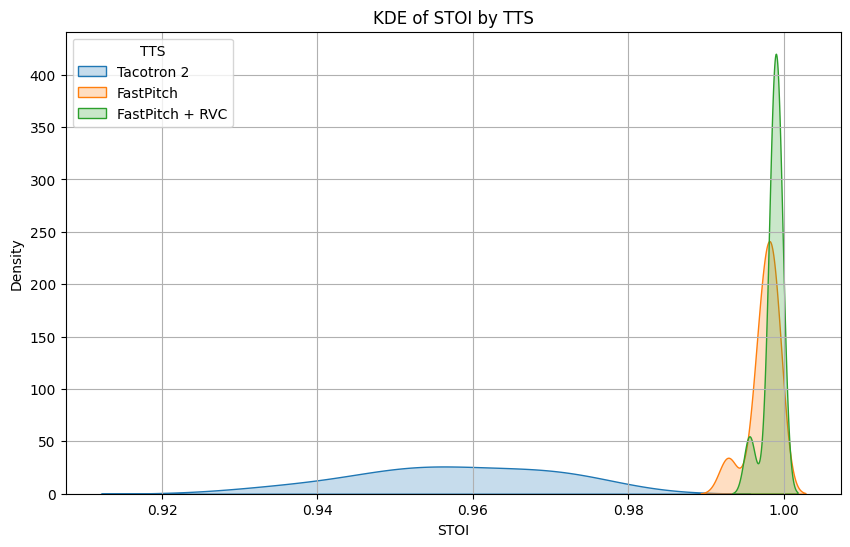

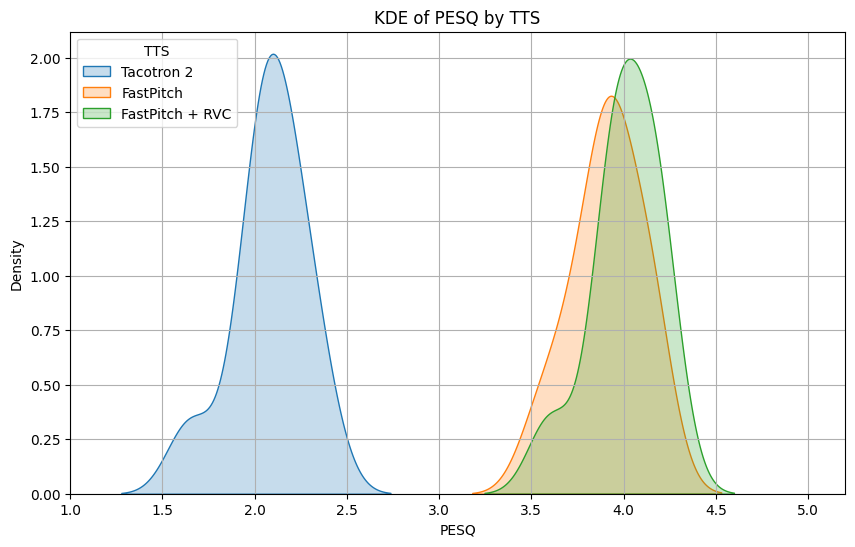

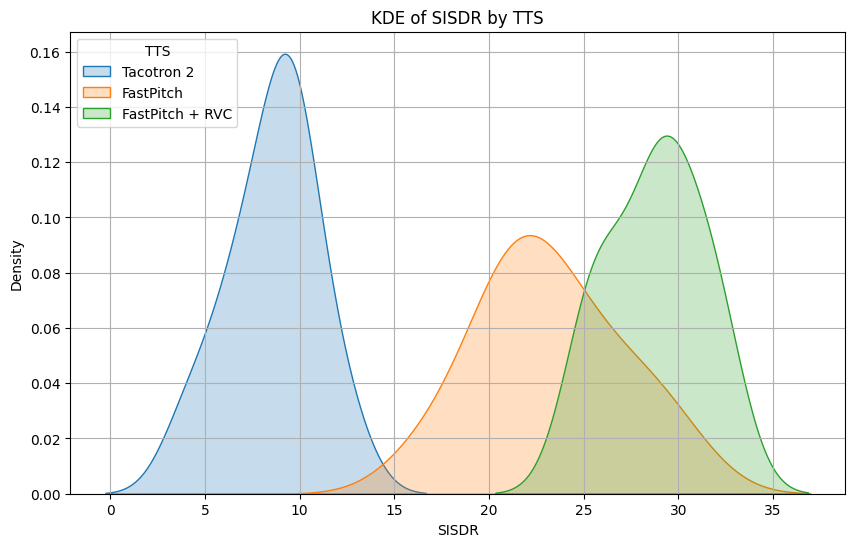

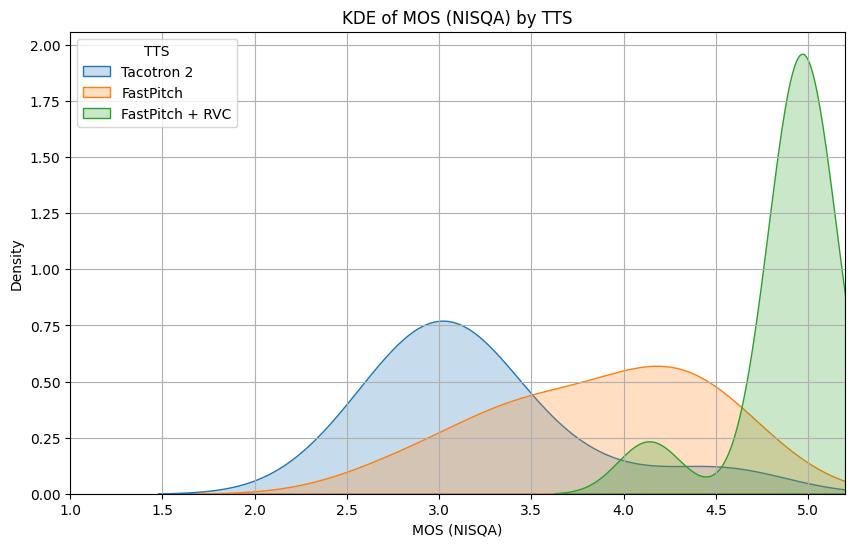

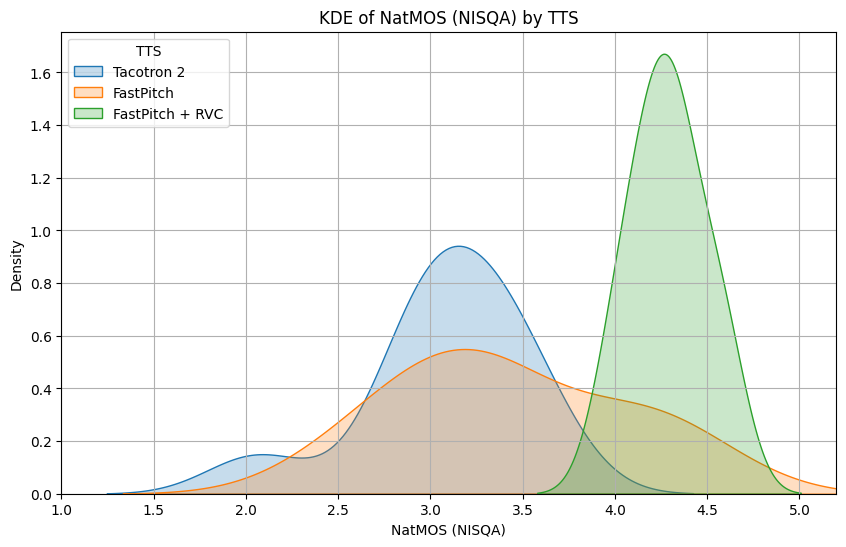

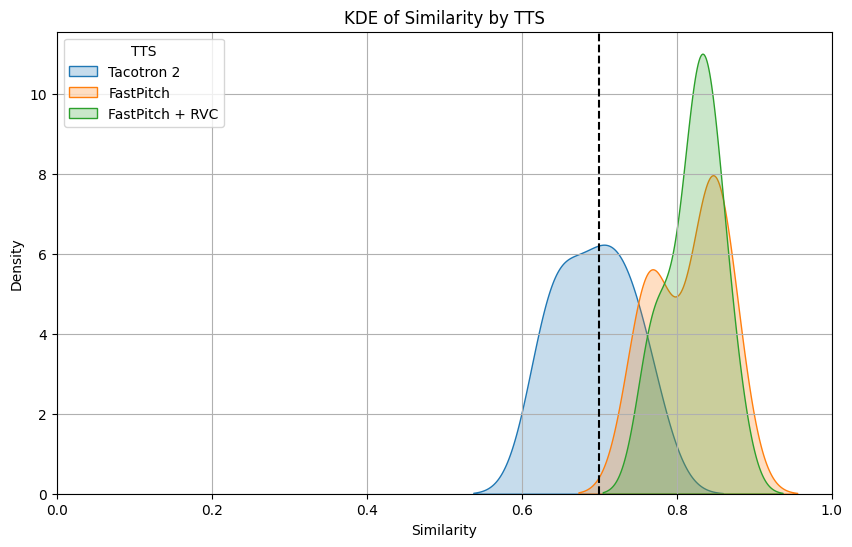

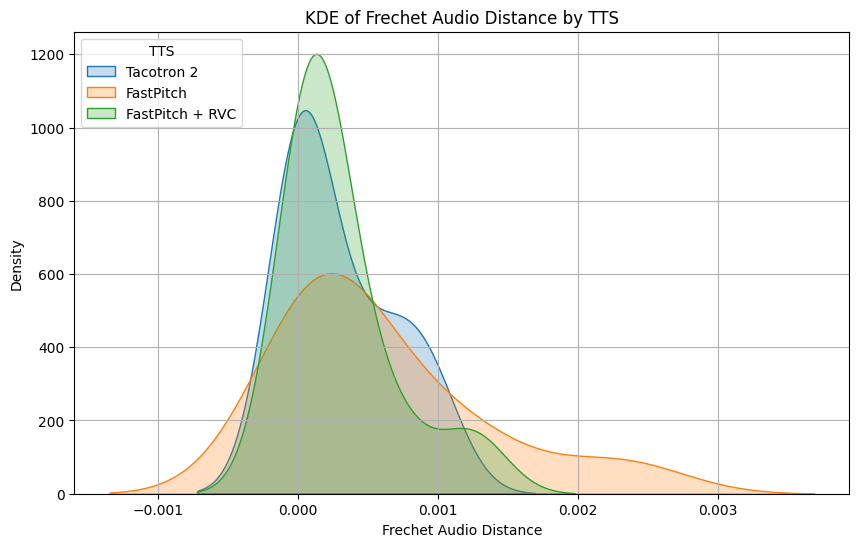

In [7]:
plot_settings = {
    "xlim": {
        "STOI": None,
        "PESQ": [1,5.2],
        "SISDR": None,
        "MOS (NISQA)": [1,5.2],
        "NatMOS (NISQA)": [1,5.2],
        "Similarity": [0,1],
        "Frechet Audio Distance": None
    },
}


numeric_columns = tts_results.select_dtypes(include=[float]).columns

tts_classes = tts_results["tts"].unique()

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    for tts_class in tts_classes:
        subset = tts_results[tts_results["tts"] == tts_class]
        sns.kdeplot(subset[column], label=tts_class, fill=True)

    if column == "Similarity":
        plt.axvline(x=0.7, color="black", linestyle="--")
    plt.title(f"KDE of {column} by TTS")
    plt.xlabel(column)
    plt.ylabel("Density")
    if plot_settings["xlim"][column]:
        plt.xlim(plot_settings["xlim"][column])
    plt.legend(title="TTS", loc="upper left")
    plt.grid()
    plt.show()

# Embedding visualization

In [ ]:
%cd ~/tesis/VoiceClonAR

In [56]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import umap
from matplotlib import pyplot as plt


from voiceclonar.quality_assessment.evaluation import SyntheticSpeechQA
from voiceclonar.quality_assessment.feature_extraction import FeatureExtractor, TitaNetEmbeddingExtractor

In [57]:
tacotron2_path = Path("test/audios/tacotron2")
fastpitch_path = Path("test/audios/fastpitch")
fastpitch_rvc_path = Path("test/audios/fastpitch_rvc")

In [104]:
def audio_folder_to_dataframe(audios_folder: Path) -> pd.DataFrame:
    audios_data = []
    for audio_i in audios_folder.iterdir():
        audios_data.append(
            {
                "speaker": "_".join(audio_i.stem.split("_")[0:2]),
                "audio": "_".join(audio_i.stem.split("_")[2:]),
                "path": audio_i
            }
        )
    return pd.DataFrame(audios_data)

fastpitch_df = audio_folder_to_dataframe(fastpitch_path)
fastpitch_rvc_df = audio_folder_to_dataframe(fastpitch_rvc_path)

In [110]:
fastpitch_all_df = pd.concat([fastpitch_df, fastpitch_rvc_df], ignore_index=True)

In [ ]:
def add_embedding(
    audios_df: pd.DataFrame,
    embedding_extractor: FeatureExtractor = TitaNetEmbeddingExtractor()
    ) -> pd.DataFrame:
    
    audios_df["embed"] = audios_df["path"].apply(embedding_extractor.process_audio)
    return audios_df

fastpitch_all_embed_df = add_embedding(fastpitch_all_df)

In [115]:
fastpitch_all_embed_df = fastpitch_all_embed_df.drop_duplicates(subset=["speaker", "audio"], ignore_index=True)

In [116]:
def add_umap_dim_reduction(audios_df: pd.DataFrame) -> pd.DataFrame:
    embeddings = [np.array(embed) for embed in audios_df['embed']]
    reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, metric='euclidean')
    umap_embeddings = reducer.fit_transform(embeddings)
    audios_df['umap'] = list(umap_embeddings)
    return audios_df

fastpitch_all_umap_df = add_umap_dim_reduction(fastpitch_all_embed_df)

In [117]:
fastpitch_all_umap_df

,speaker,audio,path,embed,umap
0,arm_06136,reference,test/audios/fastpitch/arm_06136_reference.wav,"[tensor(-0.0138), tensor(0.0762), tensor(-0.06...","[3.488902, 9.504226]"
1,arf_00295,reference,test/audios/fastpitch/arf_00295_reference.wav,"[tensor(-0.1450), tensor(-0.0309), tensor(0.13...","[5.0750427, 0.15111753]"
2,arf_00295,fastpitch,test/audios/fastpitch/arf_00295_fastpitch.wav,"[tensor(-0.0079), tensor(-0.0840), tensor(0.09...","[4.750878, -0.20791735]"
3,arm_05223,fastpitch,test/audios/fastpitch/arm_05223_fastpitch.wav,"[tensor(-0.0557), tensor(-0.0594), tensor(0.02...","[0.10203042, 10.753857]"
4,arf_03397,fastpitch,test/audios/fastpitch/arf_03397_fastpitch.wav,"[tensor(-0.0499), tensor(-0.0448), tensor(0.15...","[5.1452417, -0.97715366]"
5,arm_00610,fastpitch,test/audios/fastpitch/arm_00610_fastpitch.wav,"[tensor(-0.0597), tensor(0.1162), tensor(0.083...","[2.2927837, 7.968174]"
6,arf_03397,reference,test/audios/fastpitch/arf_03397_reference.wav,"[tensor(-0.0262), tensor(-0.0336), tensor(0.08...","[5.5307612, -1.2189374]"
7,arm_03397,reference,test/audios/fastpitch/arm_03397_reference.wav,"[tensor(0.0320), tensor(0.1221), tensor(0.1081...","[4.169625, 8.348779]"
8,arm_09697,reference,test/audios/fastpitch/arm_09697_reference.wav,"[tensor(-0.0522), tensor(0.0100), tensor(0.008...","[2.816974, 9.953821]"
9,arf_07060,fastpitch,test/audios/fastpitch/arf_07060_fastpitch.wav,"[tensor(-0.0792), tensor(-0.1278), tensor(0.03...","[6.784208, 0.64646935]"


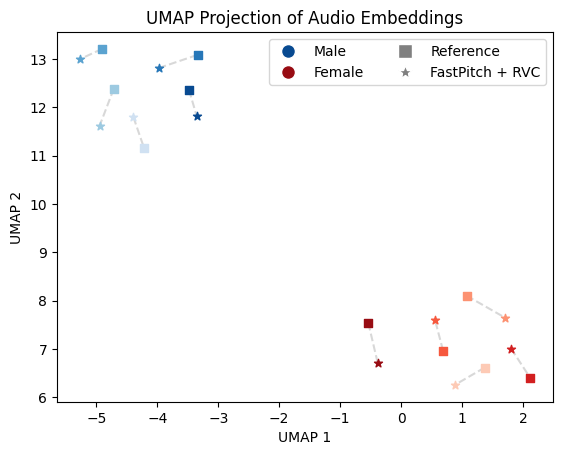

In [103]:
def plot_umap_projection(audios_df: pd.DataFrame, male_preffix: str, female_preffix: str):
    audios_df = audios_df.sort_values(by="speaker")
    # Separate UMAP coordinates
    audios_df['umap_x'] = audios_df['umap'].apply(lambda x: x[0])
    audios_df['umap_y'] = audios_df['umap'].apply(lambda x: x[1])

    # Create color scales for each group
    m_speakers = [s for s in audios_df['speaker'].unique() if s.startswith(male_preffix)]
    f_speakers = [s for s in audios_df['speaker'].unique() if s.startswith(female_preffix)]

    m_colors = plt.cm.Blues(np.linspace(0.2, 0.9, len(m_speakers)))
    f_colors = plt.cm.Reds(np.linspace(0.2, 0.9, len(f_speakers)))

    color_dict = dict(zip(m_speakers, m_colors))
    color_dict.update(dict(zip(f_speakers, f_colors)))

    # Plotting
    for speaker, group in audios_df.groupby('speaker'):
        # Plot lines for each speaker
        plt.plot(group['umap_x'], group['umap_y'], linestyle='--', color='grey', zorder=1, alpha=0.3)

        # Plot points for each speaker
        for i, row in group.iterrows():
            color = color_dict[row['speaker']]
            marker = 's' if row['audio'] == 'reference' else '*'
            plt.scatter(row['umap_x'], row['umap_y'], color=color, marker=marker, zorder=2)

    # Create custom legends for each speaker
    m_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label="Male",
                                    markerfacecolor=m_colors[-1], markersize=10)]
    f_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label="Female",
                                    markerfacecolor=f_colors[-1], markersize=10)]
    # Adding legend for marker types
    marker_legend_elements = [
        plt.Line2D([0], [0], marker='s', color='w', label='Reference', markerfacecolor='grey', markersize=10),
        plt.Line2D([0], [0], marker='*', color='w', label='FastPitch + RVC', markerfacecolor='grey', markersize=10)
    ]

    # Combine all legend elements
    all_legend_elements = m_legend_elements + f_legend_elements + marker_legend_elements

    plt.legend(handles=all_legend_elements, ncol=2)


    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title('UMAP Projection of Audio Embeddings')
    plt.show()

plot_umap_projection(tacotron2_umap_df, "arm", "arf")

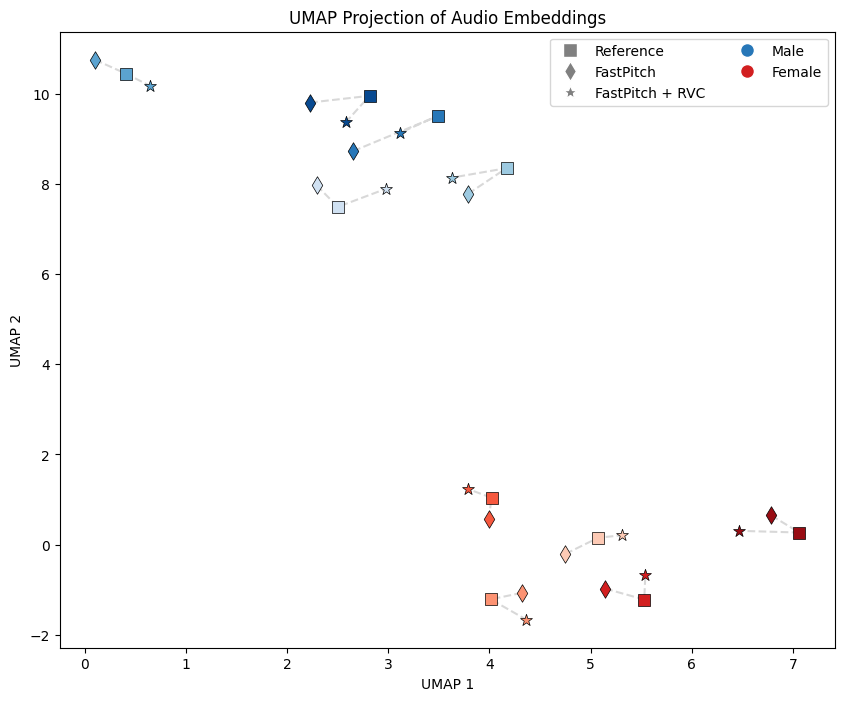

In [155]:
audios_df = fastpitch_all_umap_df
male_preffix = "arm"
female_preffix = "arf"

markers_dict = {
    "reference": {
        "shape": "s",
        "label": "Reference"
    },
    "fastpitch": {
        "shape": "d",
        "label": "FastPitch"
    },
    "fastpitch_rvc": {
        "shape": "*",
        "label": "FastPitch + RVC"
    }
}

audios_df = audios_df.sort_values(by="speaker")
# Separate UMAP coordinates
audios_df['umap_x'] = audios_df['umap'].apply(lambda x: x[0])
audios_df['umap_y'] = audios_df['umap'].apply(lambda x: x[1])

# Create color scales for each group
m_speakers = [s for s in audios_df['speaker'].unique() if s.startswith(male_preffix)]
f_speakers = [s for s in audios_df['speaker'].unique() if s.startswith(female_preffix)]

m_colors = plt.cm.Blues(np.linspace(0.2, 0.9, len(m_speakers)))
f_colors = plt.cm.Reds(np.linspace(0.2, 0.9, len(f_speakers)))

color_dict = dict(zip(m_speakers, m_colors))
color_dict.update(dict(zip(f_speakers, f_colors)))

# Plotting
plt.figure(figsize=(10,8))
for speaker, group in audios_df.groupby('speaker'):
    custom_order = ['fastpitch', 'reference', 'fastpitch_rvc']
    group['audio'] = pd.Categorical(group['audio'], categories=custom_order, ordered=True)
    group = group.sort_values('audio')
    
    plt.plot(group['umap_x'], group['umap_y'], linestyle='--', color='grey', zorder=1, alpha=0.3)

    # Plot points for each speaker
    for i, row in group.iterrows():
        color = color_dict[row['speaker']]
        marker = markers_dict[row["audio"]]["shape"]
        plt.scatter(row['umap_x'], row['umap_y'], color=color, marker=marker, s=80, edgecolors='black', linewidths=0.5, zorder=2)

# Create custom legends for each speaker
m_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label="Male",
                                markerfacecolor=m_colors[-2], markersize=10)]
f_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label="Female",
                                markerfacecolor=f_colors[-2], markersize=10)]
# Adding legend for marker types
marker_legend_elements = [
    plt.Line2D([0], [0], marker='s', color='w', label='Reference', markerfacecolor='grey', markersize=10),
    plt.Line2D([0], [0], marker='*', color='w', label='FastPitch + RVC', markerfacecolor='grey', markersize=10)
]
marker_legend_elements = [plt.Line2D([0], [0], marker=marker_i["shape"], color='w', label=marker_i["label"], markerfacecolor='grey', markersize=10) for marker_i in markers_dict.values()]

# Combine all legend elements
all_legend_elements = marker_legend_elements + m_legend_elements + f_legend_elements

plt.legend(handles=all_legend_elements, ncol=2)


plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Projection of Audio Embeddings')
plt.show()